# Project: Wrangling and Analyze Data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import tweepy
import time
import json
from wordcloud import WordCloud, STOPWORDS
import Credentials
#from IPython.display import Image
#Image('https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg')

## Settings

In [2]:
# view full tweet text
pd.set_option("display.max_colwidth", None)

In [3]:
# control gathering methods
web_scrape = False
api_query = False

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
if web_scrape:
    url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    response = requests.get(url)
    with open('image_predictions.tsv', mode='wb') as file:
        file.write(response.content)

image_df = pd.read_csv('image_predictions.tsv', sep='\t') 

In [7]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
if api_query:
    # create ids sub-lists of size 100 as maximum ids list in one request is 100 based on Twitter API documentation
    ids_limit_in_one_request = 100
    tweet_ids = list(archive_df.tweet_id.unique())
    number_of_ids = len(tweet_ids)
    split_size =  np.ceil(number_of_ids / ids_limit_in_one_request).astype(int)
    split_tweet_ids = np.array_split(tweet_ids, split_size)
    
    start_time = time.time()
    # Twitter API V2 (using Client)
    my_bearer_token = Credentials.Twitter_Bearer_Token
    twt_flds = ['id','text','public_metrics']
    
    # this loop is used to have minimum call to API (24 rather than 2356 len(tweet_ids)), as API is called with 100 Ids each time
    tweets_fetched = 0
    for ids_array in split_tweet_ids:
        ids_list = list(ids_array)
        client = tweepy.Client(bearer_token=my_bearer_token)
        tweets = client.get_tweets(ids=ids_list, tweet_fields=twt_flds)
        tweets_fetched = tweets_fetched + len(tweets.data)

        # get single tweet data
        for data in tweets.data:
            
            # loop through tweet fields and build dictionary
            dic = dict()
            for fld in twt_flds:
                # if the field is a dictionary, get that dictionary fields
                if type(data.get(fld)) == dict:
                    for key in data.get(fld):
                        dic[key] = data.get(fld)[key]
                else:
                    dic[fld] = data.get(fld)
                    
            # write the the ready tweet json object in each line
            with open('tweet_json.txt', 'a') as outfile:
                json.dump(dic, outfile)
                outfile.write('\n')         
                
    
    end_time = time.time()
    time_elapsed = end_time-start_time
    print('Process finished in {} seconds\nNumber of tweets fetched is {} out of {}'\
          .format(time_elapsed, tweets_fetched, number_of_ids))
    

#### Print Statement of API Call:
>Process finished in 25.874023914337158 seconds<br>
Number of tweets fetched is 2327 out of 2356

In [9]:
dic_list = list()
with open('tweet_json.txt', 'r') as infile:
       dic_list = [json.loads(line) for line in infile]
        
api_df = pd.DataFrame(dic_list)             

In [10]:
api_df.head()

,id,text,retweet_count,reply_count,like_count,quote_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,7071,144,34120,219
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",5345,172,29604,274
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,3512,110,22293,145
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,7283,142,37287,286
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",7815,193,35641,296


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### archive_df

In [11]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Remarks
> - Some missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,  
retweeted_status_timestamp
> - Wrong type of tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

In [12]:
archive_df[archive_df.duplicated(subset='tweet_id')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Remarks
> No duplicate ids

In [13]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Remarks
> Data seems normal. No inaccurate or invalid data. Except for rating_numerator and rating_denominator. However, this is meant to be as the rating system is supposed to be funny.

In [14]:
archive_df[archive_df.rating_numerator == 0][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
1016,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10


In [15]:
archive_df[archive_df.rating_numerator == 1776][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10


In [16]:
archive_df[archive_df.rating_denominator == 170][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170


In [17]:
archive_df[archive_df.rating_denominator == 0][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0


### Remarks
> Checking the uncommon value of rating_numerator and rating_denominator from the describe() function to make sure it was extracted correctly. It seems our initial assumption is correct.

In [18]:
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
archive_df.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

### Remarks
> - Looks like source has unique values but they are wrapped inside html tags
> - expanded_urls seems to have duplicated urls

In [20]:
archive_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [21]:
archive_df[archive_df.name == 'None'][['text', 'name']].head()

,text,name
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None
12,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,None
24,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,None
25,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,None


In [22]:
archive_df[archive_df.name == 'a'][['text', 'name']].head()

,text,name
56,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
649,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
801,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
1002,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,a
1004,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,a


In [23]:
archive_df[['text', 'name']].sample(5)

,text,name
477,Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://t.co/r4W111FzAq https://t.co/fQpYuMKG3p,Jack
1121,We only rate dogs. Pls stop sending non-canines like this Bulgarian Eyeless Porch Bear. This is unacceptable... 9/10 https://t.co/2yctWAUZ3Z,unacceptable
1336,This is Bode. He's a heavy sleeper. 9/10 https://t.co/YMkxhGWUqv,Bode
766,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",None
1377,This is Coopson. He's a Blingin Schnitzel. Built fence himself. One ear is slightly defective. 10/10 would still pet https://t.co/MWw3pVMhJA,Coopson


### Remarks
> It is clear that name column has some issues. We will investigate more

In [24]:
archive_df[archive_df.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

### Remarks
> As suspected, name column has inaccurate values with all names that begin with small letters.

In [25]:
archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [26]:
archive_df.floofer.value_counts()                     

None       2346
floofer      10
Name: floofer, dtype: int64

In [27]:
archive_df.pupper.value_counts()                                           

None      2099
pupper     257
Name: pupper, dtype: int64

In [28]:
archive_df.puppo.value_counts()                                                                  

None     2326
puppo      30
Name: puppo, dtype: int64

### Remarks
> Dog stages seems to have a lot of 'None' values. We will investigate if some observations have more than one dog stage.

In [29]:
archive_df.groupby(["doggo","floofer","pupper","puppo"]).size().reset_index().rename(columns={0:"count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


### Remarks
> It seems that some observations actually have more than one dog stage

### image_df

In [30]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Remarks
> - No missing values
> - Wrong type of tweet_id

In [31]:
image_df[image_df.duplicated(subset='tweet_id')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [32]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Remarks
> No duplicates and no strange values

In [33]:
image_df.jpg_url.value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

In [34]:
image_df.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [35]:
image_df.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [36]:
image_df.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

### Remarks
> Initially, it doesn't seem there are any issues with categorical variables

### api_df

In [37]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             2327 non-null   int64 
 1   text           2327 non-null   object
 2   retweet_count  2327 non-null   int64 
 3   reply_count    2327 non-null   int64 
 4   like_count     2327 non-null   int64 
 5   quote_count    2327 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 109.2+ KB


### Remarks
> - No missing values
> - Wrong type of id

In [38]:
api_df[api_df.duplicated(subset='id')]

,id,text,retweet_count,reply_count,like_count,quote_count


In [39]:
api_df.describe()

,id,retweet_count,reply_count,like_count,quote_count
count,2.327000e+03,2327.000000,2327.000000,2327.000000,2327.000000
mean,7.417930e+17,2492.878814,42.690159,7117.647615,71.568543
std,6.820795e+16,4221.034326,71.622877,11059.277433,220.362629
min,6.660209e+17,1.000000,0.000000,0.000000,0.000000
25%,6.781394e+17,500.500000,9.000000,1235.000000,0.000000
50%,7.178418e+17,1159.000000,24.000000,3071.000000,1.000000
75%,7.986547e+17,2885.000000,48.500000,8690.500000,69.500000
max,8.924206e+17,71371.000000,1136.000000,145986.000000,4353.000000


### Remarks
> no duplicates and no strange numerical values

### Quality issues

1. Missing value in: archive_df("in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "expanded_urls")
<br><br>
2. Not needed columns: archive_df("in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "expanded_urls" )
<br><br>
3. Wrong type of: archive_df("tweet_id", "in_reply_to_status_id", "in_reply_to_user_id", "timestamp", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"), image_df("tweet_id"), api_df("id").
<br><br>
4. Some entries in archive_df("expanded_urls") has more than one url (seems duplicated)
<br><br>
5. Inaccurate value of 'a', 'an', 'the' in archive_df("name")
<br><br>
6. archive_df("text") has extra url
<br><br>
7. archive_df("source") has html tag
<br><br>
8. api_df has less tweets that archived_df
<br><br>
9. Some columns have None string instead of NaN value such as archive_df("name") and the different dog stages
<br><br>
10. Inaccurate values of archive_df("rating_numerator"), archive_df("rating_denominator") (for decimal rating in text)

### Tidiness issues
1. Dog stages is represented in multiple columns
<br><br>
2. Dog tweets information is ditributed among three datasets (archived_df, imagess_df, and api_df)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [40]:
# Make copies of original pieces of data
archive_df_copy = archive_df.copy()
image_df_copy = image_df.copy()
api_df_copy = api_df.copy()

### Quality Issue #1 & #2:
 Missing value in: "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id",    "retweeted_status_timestamp", "expanded_urls"
 
 Not needed columns: "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "expanded_urls"

#### Define:
Remove retweets observations and since the only missing values columns are also not needed, they will be dropped.

#### Code

In [41]:
archive_df_copy = archive_df_copy[archive_df_copy['retweeted_status_id'].isna()]
archive_df_copy = archive_df_copy[archive_df_copy['retweeted_status_user_id'].isna()]
archive_df_copy = archive_df_copy[archive_df_copy['retweeted_status_timestamp'].isna()]

In [42]:
cols = ["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id",\
       "retweeted_status_timestamp", "expanded_urls"]
archive_df_copy.drop(columns=cols, axis=1, inplace=True)

#### Test

In [43]:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Quality Issue #3:
Wrong type of: archive_df("tweet_id", "in_reply_to_status_id", "in_reply_to_user_id", "timestamp", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"), image_df("tweet_id"), api_df("id").

#### Define
Convert ID columns from int to string and timestamp columns from string to date, only for archive_df("tweet_id", "timestamp"), image_df("tweet_id"), api_df("id"), since others were dropped

#### Code

In [44]:
archive_df_copy['tweet_id'] = archive_df_copy['tweet_id'].astype(str)
archive_df_copy['timestamp'] = pd.to_datetime(archive_df_copy['timestamp'])

image_df_copy['tweet_id'] = image_df_copy['tweet_id'].astype(str)

api_df_copy['id'] = api_df_copy['id'].astype(str)
api_df_copy.rename(columns={'id':'tweet_id'}, inplace=True)
api_df_copy.drop(['text'], axis=1, inplace=True)

#### Test

In [45]:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 203.9+ KB


In [46]:
image_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [47]:
api_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2327 non-null   object
 1   retweet_count  2327 non-null   int64 
 2   reply_count    2327 non-null   int64 
 3   like_count     2327 non-null   int64 
 4   quote_count    2327 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 91.0+ KB


### Tidiness Issue #1:
Dog stages is represented in multiple columns

#### Define
Create a new column "dog_stage" and select the not-none value of other dog stage columns, or none if there isn't any. Then, drop dog stage columns.

#### Code

In [48]:
# conditions for non-none values
conds = [archive_df_copy['doggo'] != 'None', 
         archive_df_copy['floofer'] != 'None', 
         archive_df_copy['pupper'] != 'None',
         archive_df_copy['puppo'] != 'None',]

# based on condition, choose appropriate value
choices = [archive_df_copy['doggo'], 
           archive_df_copy['floofer'], 
           archive_df_copy['pupper'],
           archive_df_copy['puppo'],]

archive_df_copy['dog_stage'] = np.select(conds, choices, default='None')

In [49]:
archive_df_copy[['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']].head(20)

,doggo,floofer,pupper,puppo,dog_stage
0,None,None,None,None,None
1,None,None,None,None,None
2,None,None,None,None,None
3,None,None,None,None,None
4,None,None,None,None,None
5,None,None,None,None,None
6,None,None,None,None,None
7,None,None,None,None,None
8,None,None,None,None,None
9,doggo,None,None,None,doggo


In [50]:
archive_df_copy.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [51]:
archive_df_copy.columns.tolist()

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

### Tidiness Issue #2:
Dog tweets information is ditributed among three datasets (archived_df, imagess_df, and api_df)

#### Define
Join the three datasets using (merge) to join by "tweet_id"

#### Code

In [52]:
merged_1_df = pd.merge(archive_df_copy, image_df_copy, how='inner', on='tweet_id')
merged_df = pd.merge(merged_1_df, api_df_copy, how='inner', on='tweet_id')
merged_df_copy = merged_df.copy()

#### Test

In [53]:
merged_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   object             
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source              1986 non-null   object             
 3   text                1986 non-null   object             
 4   rating_numerator    1986 non-null   int64              
 5   rating_denominator  1986 non-null   int64              
 6   name                1986 non-null   object             
 7   dog_stage           1986 non-null   object             
 8   jpg_url             1986 non-null   object             
 9   img_num             1986 non-null   int64              
 10  p1                  1986 non-null   object             
 11  p1_conf             1986 non-null   float64            
 12  p1_dog              1986 non-null 

### Quality Issue #4:
Some entries in archive_df("expanded_urls") has more than one url (seems duplicated)
<br>
<span style="color:green">(No need to clean as the column is not needed and therefore was dropped)</span>

### Quality Issue #5:
Inaccurate value of 'a', 'an', 'the' in "name"

#### Define
Use regular expression to find names with 'a','an','the' and replace it with name from "text" column by using another regular expression or none if there is no name

#### Code

In [54]:
# regex to get any names with values: a, an, or the
bools = merged_df_copy.name.str.match('^a$|^an$|^the$')
merged_df_copy.loc[bools][['text','name']].tail(20)

,text,name
1888,This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10 https://t.co/ZU0i0KJyqD,a
1895,This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe,a
1904,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,a
1918,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,a
1934,This is a curly Ticonderoga named Pepe. No feet. Loves to jet ski. 11/10 would hug until forever https://t.co/cyDfaK8NBc,a
1941,This is a purebred Bacardi named Octaviath. Can shoot spaghetti out of mouth. 10/10 https://t.co/uEvsGLOFHa,a
1944,This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly https://t.co/uQbZJM2DQB,a
1957,This is a southern Vesuvius bumblegruff. Can drive a truck (wow). Made friends with 5 other nifty dogs (neat). 7/10 https://t.co/LopTBkKa8h,a
1963,This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL,an
1964,This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,a


In [55]:
# replace with correct name obtained after string 'named' or 'name is' in "text" column
merged_df_copy.loc[bools, 'name'] = merged_df_copy.loc[bools]['text'].str.extract(r'(?:(?<=named)|(?<=name is))(.*?)(?=\.)')[0]

# replace with none if string 'named' is not found
merged_df_copy['name'].fillna(value='None', inplace=True)

#### Test

In [56]:
merged_df_copy.loc[bools][['text','name']].tail(20)

,text,name
1888,This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10 https://t.co/ZU0i0KJyqD,Jessiga
1895,This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe,Klint
1904,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,Kohl
1918,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW,Daryl
1934,This is a curly Ticonderoga named Pepe. No feet. Loves to jet ski. 11/10 would hug until forever https://t.co/cyDfaK8NBc,Pepe
1941,This is a purebred Bacardi named Octaviath. Can shoot spaghetti out of mouth. 10/10 https://t.co/uEvsGLOFHa,Octaviath
1944,This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly https://t.co/uQbZJM2DQB,Johm
1957,This is a southern Vesuvius bumblegruff. Can drive a truck (wow). Made friends with 5 other nifty dogs (neat). 7/10 https://t.co/LopTBkKa8h,None
1963,This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL,None
1964,This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,None


### Quality Issue #6:
"text" has extra url

#### Define


#### Code

In [57]:
merged_df_copy[['text']].head()

,text
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"


In [58]:
# check if all texts contain http link by counting and comparing to dataset size
merged_df_copy.text.str.match('.*(http)+').count() == merged_df_copy.shape[0]

True

In [59]:
# extract url from text into a new column
merged_df_copy['tweet_url'] = merged_df_copy.text.str.extract(r'(http.*)')[0]

# remove url from text
merged_df_copy['text'] = merged_df_copy.text.str.replace(r'(http.*)','', regex=True)

#### Test

In [60]:
merged_df_copy[['text', 'tweet_url']].head()

,text,tweet_url
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://t.co/MgUWQ76dJU
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://t.co/0Xxu71qeIV
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://t.co/wUnZnhtVJB
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://t.co/tD36da7qLQ
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",https://t.co/AtUZn91f7f


### Quality Issue #7:
"source" has html tag

#### Define
replace html tag with empty string in column "source" using replace and regular expression

#### Code

In [61]:
merged_df_copy['source'].head()

0    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

In [62]:
merged_df_copy['source'] = merged_df_copy['source'].str.replace(r'<[^<>]*>', '', regex=True)

#### Test

In [63]:
merged_df_copy['source'].head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

In [64]:
merged_df_copy['source'].value_counts()

Twitter for iPhone    1948
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

### Quality Issue #8:
api_df has less tweets that archived_df
<br>
<span style="color:green">(It's a quality issue which suggests that some tweets got deleted, but it doesn't need cleaning)</span>

### Quality Issue #9:
Dog name and stages have "None" string as values

#### Define
Check that dog stages actually not available or not by extracting doggo|floofer|pupper|puppo from the text.
As for name, hence they cannot be specifed as for dog stages, we will replace "None" string with "Not Provided"

#### Code

In [65]:
merged_df_copy['dog_stage'].value_counts()

None       1681
pupper      203
doggo        73
puppo        22
floofer       7
Name: dog_stage, dtype: int64

In [66]:
# get all dog stages with none values 
dogs_bools = (merged_df_copy['dog_stage'] == 'None')

# extract information from text for different dog stages
merged_df_copy.loc[dogs_bools, 'dog_stage'] = merged_df_copy.loc[dogs_bools].text.str.extract(r'(doggo|floofer|pupper|puppo)')[0]

# replace nan with string 'not provided'
merged_df_copy['dog_stage'].replace(np.nan, 'not provided', inplace=True)

In [67]:
merged_df_copy['name'].value_counts()

None          592
Cooper         10
Charlie        10
Oliver         10
Tucker          9
             ... 
Luna            1
Spencer         1
Lilli           1
Boston          1
Christoper      1
Name: name, Length: 952, dtype: int64

In [68]:
# replace 'None' with string 'not provided'
merged_df_copy['name'].replace('None', 'not provided', inplace=True)

#### Test

In [69]:
merged_df_copy['dog_stage'].value_counts()

not provided    1648
pupper           226
doggo             79
puppo             26
floofer            7
Name: dog_stage, dtype: int64

In [70]:
merged_df_copy['name'].value_counts()

not provided    592
Cooper           10
Charlie          10
Oliver           10
Tucker            9
               ... 
Luna              1
Spencer           1
Lilli             1
Boston            1
Christoper        1
Name: name, Length: 952, dtype: int64

In [71]:
merged_df_copy[['text', 'dog_stage',  'name']].head(10)

,text,dog_stage,name
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,not provided,Phineas
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",not provided,Tilly
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,not provided,Archie
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,not provided,Darla
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",not provided,Franklin
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,not provided,not provided
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\n,not provided,Jax
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,not provided,not provided
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,not provided,Zoey
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,doggo,Cassie


### Quality Issue #10:
 Inaccurate values of "rating_numerator", "rating_denominator" (for decimal rating in text)

#### Define
Create regex to match for deciaml ratings in "text" and then extract the decimal ratings to modify the corresponding "rating_numerator" and "rating_denominator"

#### Code

In [72]:
# get records that has any decimal value for rating in "text" column
rating_match = r'^.*\d+\.\d+/\d+.*$|^.*\d+/\d+\.\d+.*$|^.*\d+\.\d+/\d+\.\d+.*$'
rating_bools = merged_df_copy.text.str.match(rating_match)
merged_df_copy.loc[rating_bools][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
39,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",5,10
499,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75,10
548,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,27,10
1367,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26,10


In [73]:
# convert ratings to decimal
merged_df_copy[['rating_numerator', 'rating_denominator']] = merged_df_copy[['rating_numerator', 'rating_denominator']].astype(float)

# create a regex and extract decimal ratings
rating_extract = r'(\d+\.\d+/\d+|\d+/\d+\.\d+|\d+\.\d+/\d+\.\d+)'
rating_dec_df = merged_df_copy.loc[rating_bools]['text'].str.extract(rating_extract)[0].str.split('/', expand=True)

# modify corresponding ratings
merged_df_copy.loc[rating_bools, 'rating_numerator'] = rating_dec_df[0].astype(float)
merged_df_copy.loc[rating_bools, 'rating_denominator'] = rating_dec_df[1].astype(float)

#### Test

In [74]:
merged_df_copy.loc[rating_bools][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
39,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",13.50,10.0
499,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",9.75,10.0
548,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,11.27,10.0
1367,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,11.26,10.0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [75]:
df_cleaned = merged_df_copy.copy()
if not os.path.exists('twitter_archive_master.csv'):
    df_cleaned.to_csv('twitter_archive_master.csv', index=False) 

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [76]:
df_cleaned.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,reply_count,like_count,quote_count,tweet_url
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10.0,Phineas,not provided,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.085851,False,banana,0.076110,False,7071,144,34120,219,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13.0,10.0,Tilly,not provided,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.090647,True,papillon,0.068957,True,5345,172,29604,274,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12.0,10.0,Archie,not provided,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.078253,True,kelpie,0.031379,True,3512,110,22293,145,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13.0,10.0,Darla,not provided,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.168086,True,spatula,0.040836,False,7283,142,37287,286,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",12.0,10.0,Franklin,not provided,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.225770,True,German_short-haired_pointer,0.175219,True,7815,193,35641,296,https://t.co/AtUZn91f7f


In [77]:
df_cleaned['rating'] = (df_cleaned.rating_numerator / df_cleaned.rating_denominator).astype(float)
cols = ['rating', 'retweet_count', 'reply_count', 'like_count', 'quote_count']
log_df = df_cleaned[cols].applymap(lambda x: np.log(x+1))

<Figure size 720x720 with 0 Axes>

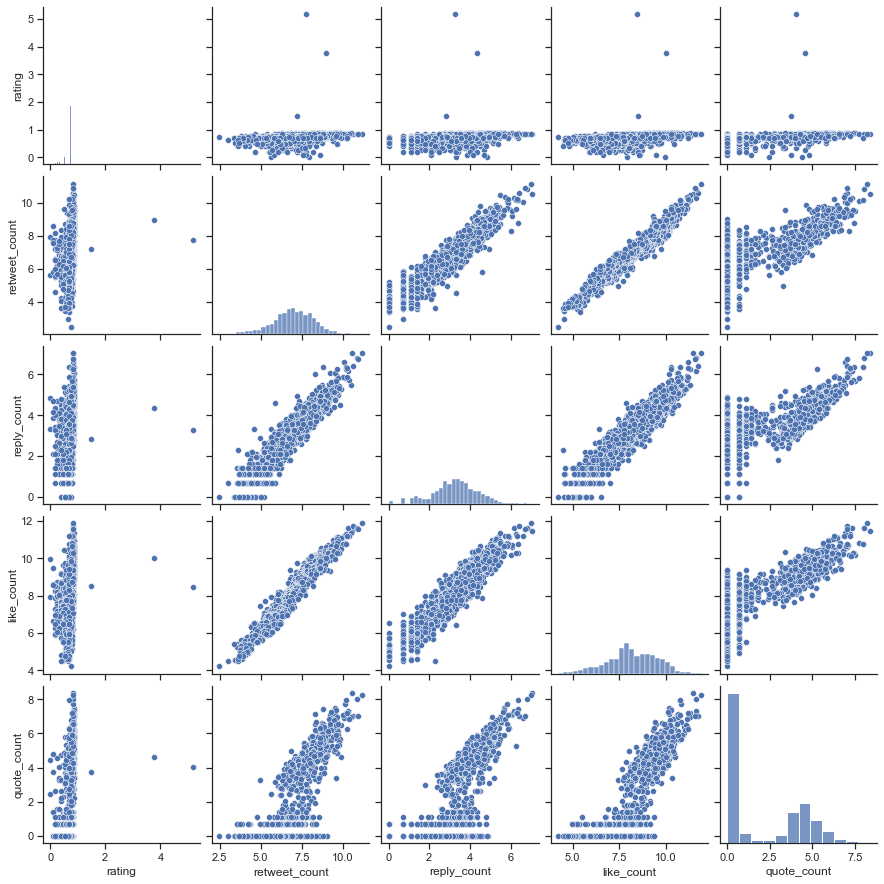

In [78]:
plt.figure(figsize=(10,10))
sns.set_theme(style="ticks")
fig1 = sns.pairplot(log_df)
plt.show();

In [79]:
if not os.path.exists('visuals'):
    os.makedirs('visuals')
    fig1.figure.savefig('visuals/scatter_matrix.png')
elif not os.path.exists('visuals/scatter_matrix.png'):
    fig1.figure.savefig('visuals/scatter_matrix.png')

In [80]:
corr_mtx = df_cleaned[cols].corr()

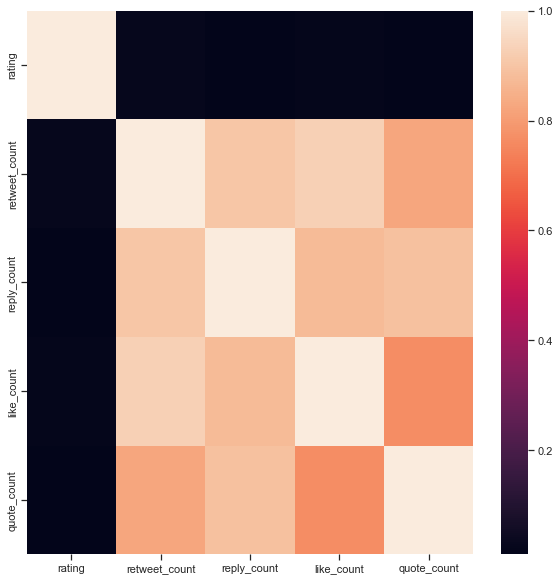

In [81]:
plt.figure(figsize=(10,10))
fig2 = sns.heatmap(corr_mtx)
plt.show()

In [82]:
if not os.path.exists('visuals'):
    os.makedirs('visuals')
    fig2.figure.savefig('visuals/heat_map.png')
elif not os.path.exists('visuals/heat_map.png'):
    fig2.figure.savefig('visuals/heat_map.png')

### Insight 1:
- It appears from the scatter plot and heatmap that there is a strong positive linear relatioship between the public metrics (retweet, reply, like, and quote counts) with values over 0.7 which means when one increases so do the others. As for the rating, it has no linear relationship at all to the public metrics and this is expected becasue of the nature of the funny rating system of the account that rates dogs without standards.

In [83]:
source_stage_df = df_cleaned.query('dog_stage != "not provided"')\
                  .groupby(['source', 'dog_stage'], as_index=False)['tweet_id'].count()

source_nostage_df = df_cleaned.query('dog_stage == "not provided"')\
                  .groupby(['source', 'dog_stage'], as_index=False)['tweet_id'].count()

In [84]:
source_stage_df

,source,dog_stage,tweet_id
0,TweetDeck,doggo,1
1,TweetDeck,pupper,1
2,Twitter Web Client,doggo,1
3,Twitter Web Client,pupper,1
4,Twitter for iPhone,doggo,77
5,Twitter for iPhone,floofer,7
6,Twitter for iPhone,pupper,224
7,Twitter for iPhone,puppo,26


In [85]:
source_nostage_df

,source,dog_stage,tweet_id
0,TweetDeck,not provided,8
1,Twitter Web Client,not provided,26
2,Twitter for iPhone,not provided,1614


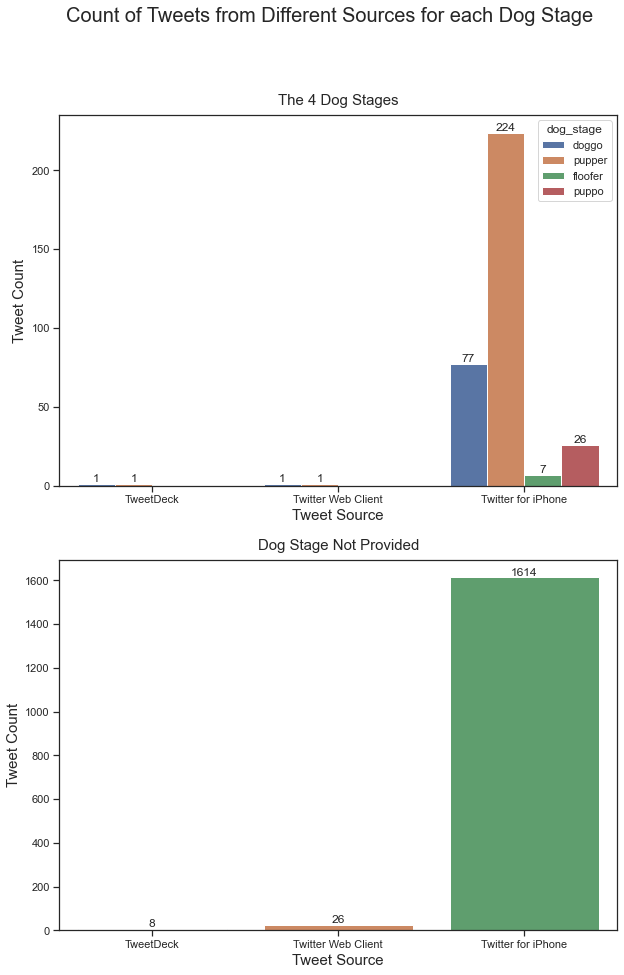

In [86]:
fig3, axes = plt.subplots(2, 1, figsize=(10, 15))
fig3.suptitle('Count of Tweets from Different Sources for each Dog Stage', fontsize=20)

ax0 = sns.barplot(ax=axes[0], data=source_stage_df, x='source', y='tweet_id', hue='dog_stage')
for container in ax0.containers:
    ax0.bar_label(container)
    
axes[0].set_title('The 4 Dog Stages', fontsize=15, y=1.01)
axes[0].set_xlabel('Tweet Source', fontsize=15)
axes[0].set_ylabel('Tweet Count', fontsize=15)
  
ax1 = sns.barplot(ax=axes[1], data=source_nostage_df, x='source', y='tweet_id')
for container in ax1.containers:
    ax1.bar_label(container)
    
axes[1].set_title('Dog Stage Not Provided', fontsize=15, y=1.01)
axes[1].set_xlabel('Tweet Source', fontsize=15)
axes[1].set_ylabel('Tweet Count', fontsize=15);

In [87]:
if not os.path.exists('visuals'):
    os.makedirs('visuals')
    fig3.figure.savefig('visuals/source_stage.png')
elif not os.path.exists('visuals/source_stage.png'):
    fig3.figure.savefig('visuals/source_stage.png')

### Insight 2:
- It looks like from both plots that almost all tweets come from one source 'Twitter for iPhone'. Also among dog stages, 'pupper' seems to have the highest number of tweets while 'floofer' is the lowest. In addition, many tweets didn't specify the dog stage in their text indicated by the second plot

In [88]:
# extract date to a new column
df_cleaned['date'] = df_cleaned['timestamp'].dt.date

In [89]:
time_df = df_cleaned.query('dog_stage != "not provided"').groupby(['date', 'dog_stage'], as_index=False).mean()

In [90]:
time_df.head()

,date,dog_stage,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,reply_count,like_count,quote_count,rating
0,2015-11-26,pupper,9.000000,10.0,1.0,0.176320,0.000000,0.097487,0.000000,0.086502,1.0,70.000000,3.000000,293.000000,1.00,0.900000
1,2015-12-02,pupper,8.000000,10.0,1.0,0.561027,1.000000,0.222114,1.000000,0.065456,1.0,305.000000,11.000000,776.000000,0.00,0.800000
2,2015-12-03,pupper,10.666667,10.0,1.0,0.843851,0.666667,0.052818,0.666667,0.033116,1.0,596.333333,18.666667,1315.333333,0.00,1.066667
3,2015-12-04,pupper,9.500000,10.0,1.0,0.814314,0.500000,0.096973,0.500000,0.017729,0.5,461.000000,9.750000,1064.000000,0.25,0.950000
4,2015-12-05,pupper,8.750000,10.0,1.0,0.721554,0.500000,0.087425,0.500000,0.039555,0.5,476.750000,15.250000,1187.750000,0.00,0.875000


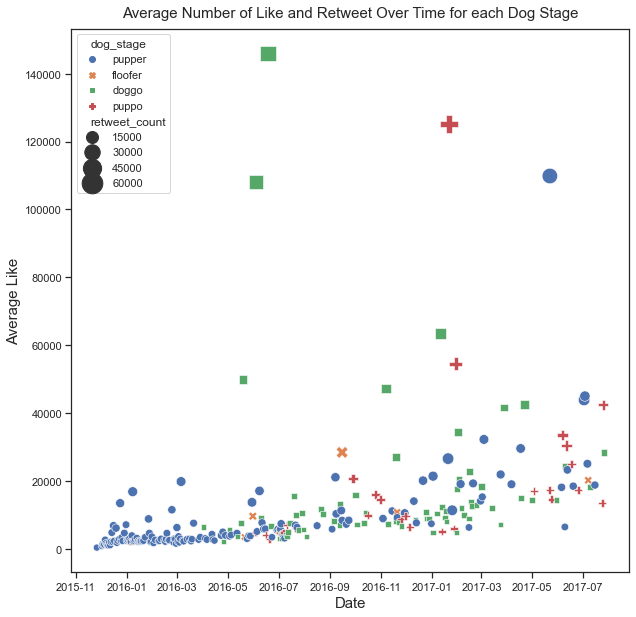

In [91]:
plt.figure(figsize=(10,10))
fig4 = sns.scatterplot(data=time_df, x='date', y='like_count', hue='dog_stage', style='dog_stage' ,size='retweet_count', sizes=(50, 500))
plt.title('Average Number of Like and Retweet Over Time for each Dog Stage', fontsize=15, y=1.01)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Average Like', fontsize=15)
plt.show();

In [92]:
if not os.path.exists('visuals'):
    os.makedirs('visuals')
    fig4.figure.savefig('visuals/like_retweet.png')
elif not os.path.exists('visuals/like_retweet.png'):
    fig4.figure.savefig('visuals/like_retweet.png')

### Insight 3:
- We can see that for the period from 2015-11 until 2016-05 (half a year), nearly all tweets (with dog stage specifed) were about dogs in pupper stage. Then afterwards, other tweets of different dog stages started to show up. Also, the chart shows that doggo stage is generally prefered having high avergae number of likes and retweets compared to others.

There are 198420 words in column 'text'.


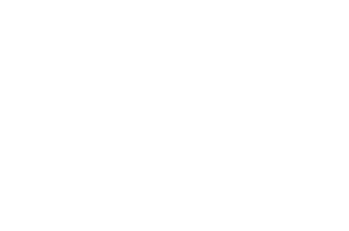

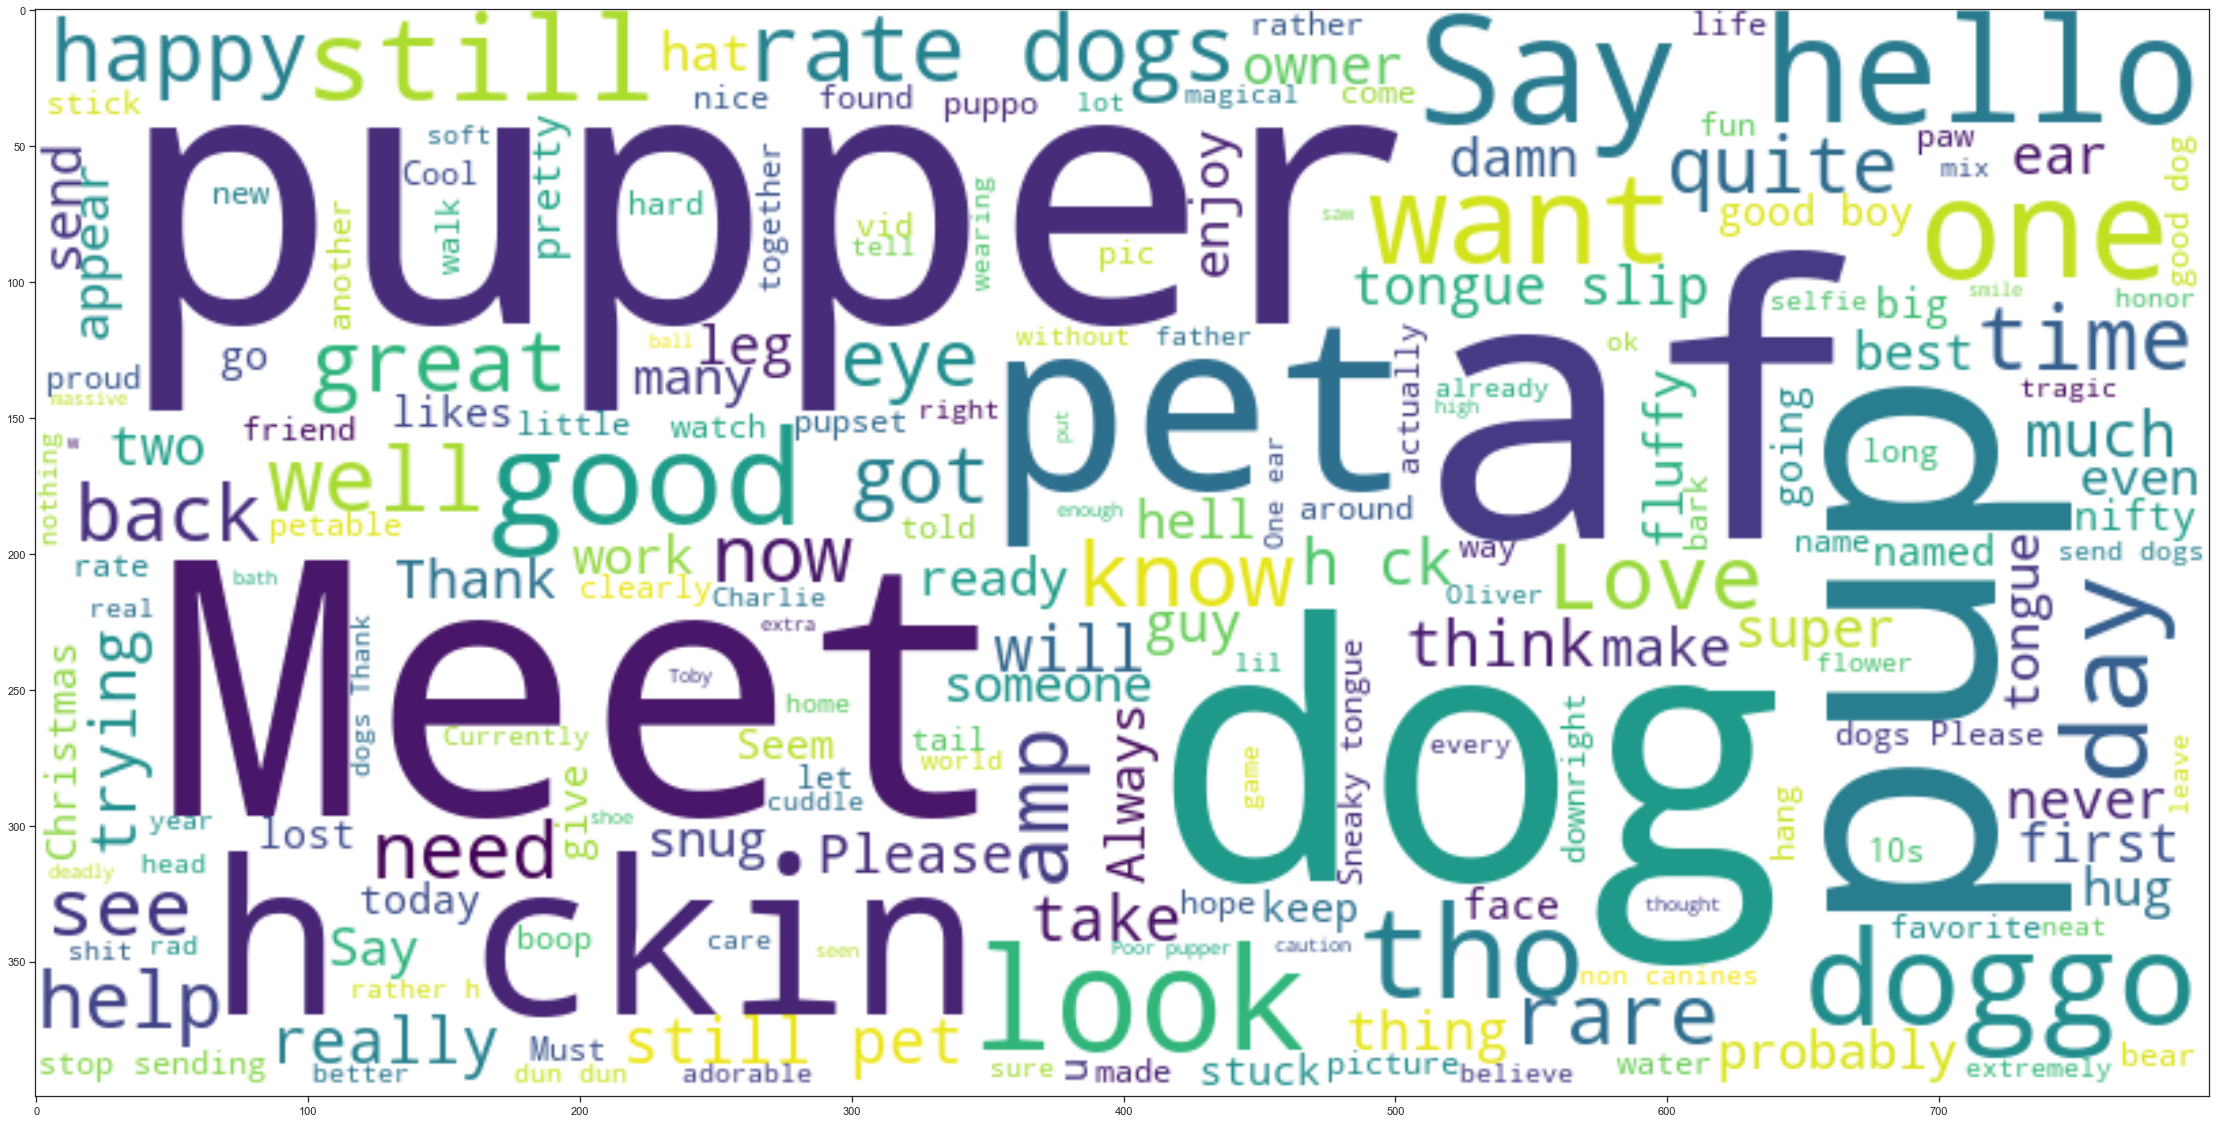

In [93]:
# Text of all words in column bloom
text = " ".join(word for word in df_cleaned.text.astype(str))
print ("There are {} words in column 'text'.".format(len(text)))

# Create stopword list to remove words from the cloud
stopwords = set(STOPWORDS)
#stopwords.update(["named"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated image:
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [94]:
if not os.path.exists('visuals'):
    os.makedirs('visuals')
    wordcloud.to_file('visuals/word_cloud.png')
elif not os.path.exists('visuals/word_cloud.png'):
    wordcloud.to_file('visuals/word_cloud.png')

### Insight 4:
- Clearly from the word cloud, dog stage pupper is the most frequent word and it confirms to what we showed in the bar plot that most tweets are about pupper dog stage. Other words like: pet, dog, meet, hello are ones of the most occurance as well. This is expected as this account usually greet the dog which is a pet and then gives it a rating.

### Insights:
1. It appears from the scatter plot and heatmap that there is a strong positive linear relatioship between the public metrics (retweet, reply, like, and quote counts) with values over 0.7 which means when one increases so do the others. As for the rating, it has no linear relationship at all to the public metrics and this is expected becasue of the nature of the funny rating system of the account that rates dogs without standards.
<br><br>
2. It looks like from both plots that almost all tweets come from one source 'Twitter for iPhone'. Also among dog stages, 'pupper' seems to have the highest number of tweets while 'floofer' is the lowest. In addition, many tweets didn't specify the dog stage in their text.
<br><br>
3. We can see that for the period from 2015-11 until 2016-05 (half a year), nearly all tweets (with dog stage specifed) were about dogs in pupper stage. Then afterwards, other tweets of different dog stages started to show up. Also, the chart shows that doggo stage is generally prefered having high avergae number of likes and retweets compared to others.
<br><br>
4. Clearly from the word cloud, dog stage pupper is the most frequent word and it confirms to what we showed in the bar plot that most tweets are about pupper dog stage. Other words like: pet, dog, meet, hello are ones of the most occurance as well. This is expected as this account usually greet the dog which is a pet and then gives it a rating.